In [2]:
import numpy as np 
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.
31790344/31790344 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb2 (Functional)     │ (None, 9, 9, 1408)     │     7,768,569 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1408)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         8,454 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,777,023 (29.67 MB)

 Trainable params: 8,454 (33.02 KB)

 Non-trainable params: 7,768,569 (29.63 MB)

c:\Users\Adrián\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7923 - loss: 0.6524

c:\Users\Adrián\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


340/340 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.7926 - loss: 0.6515 - val_accuracy: 0.9572 - val_loss: 0.1319
Epoch 2/8
  1/340 ━━━━━━━━━━━━━━━━━━━━ 7:12 1s/step - accuracy: 1.0000 - loss: 0.0897

c:\Users\Adrián\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


340/340 ━━━━━━━━━━━━━━━━━━━━ 108s 315ms/step - accuracy: 1.0000 - loss: 0.0897 - val_accuracy: 0.9568 - val_loss: 0.1308
Epoch 3/8
340/340 ━━━━━━━━━━━━━━━━━━━━ 587s 2s/step - accuracy: 0.9589 - loss: 0.1455 - val_accuracy: 0.9799 - val_loss: 0.0812
Epoch 4/8
340/340 ━━━━━━━━━━━━━━━━━━━━ 109s 319ms/step - accuracy: 0.9688 - loss: 0.0840 - val_accuracy: 0.9803 - val_loss: 0.0808
Epoch 5/8
340/340 ━━━━━━━━━━━━━━━━━━━━ 583s 2s/step - accuracy: 0.9645 - loss: 0.1120 - val_accuracy: 0.9807 - val_loss: 0.0661
Epoch 6/8
340/340 ━━━━━━━━━━━━━━━━━━━━ 107s 311ms/step - accuracy: 0.9688 - loss: 0.0885 - val_accuracy: 0.9807 - val_loss: 0.0661
Epoch 7/8
340/340 ━━━━━━━━━━━━━━━━━━━━ 577s 2s/step - accuracy: 0.9727 - loss: 0.0878 - val_accuracy: 0.9840 - val_loss: 0.0544
Epoch 8/8
340/340 ━━━━━━━━━━━━━━━━━━━━ 106s 308ms/step - accuracy: 0.9688 - loss: 0.0838 - val_accuracy: 0.9847 - val_loss: 0.0535


85/85 ━━━━━━━━━━━━━━━━━━━━ 2614s 31s/step - accuracy: 0.9837 - loss: 0.0565
Validation loss: 0.05407470464706421
Validation accuracy: 0.9844329357147217


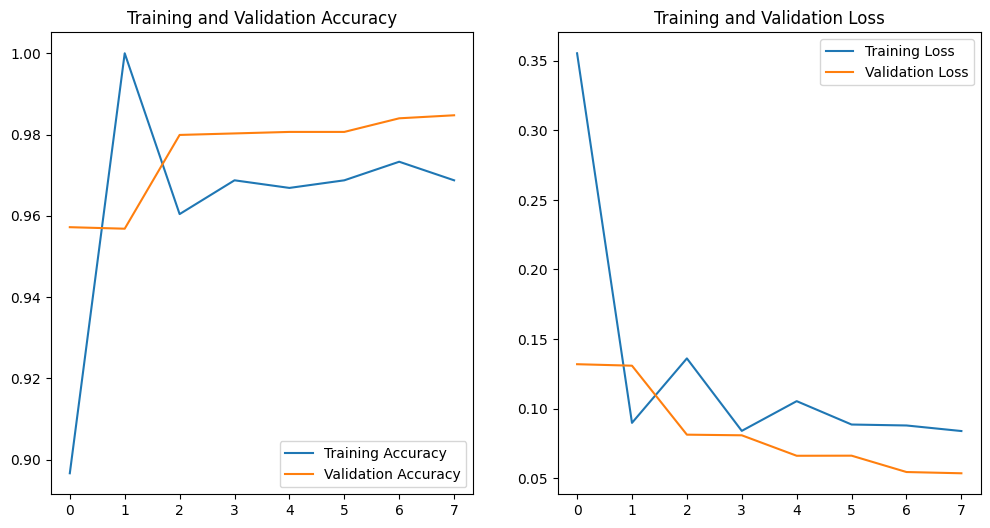

In [3]:
# Define paths to the training and validation datasets
train_dir = '.gitignore/dataset/train/'
validation_dir = '.gitignore/dataset/test/'

# Set parameters
img_height, img_width = 260, 260  # EfficientNetB2 expects 260x260 images
batch_size = 32
epochs = 8
num_classes = 6  # Set this to the number of classes in your dataset

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only preprocessing for validation
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Flow validation images in batches using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the EfficientNetB2 model pre-trained on ImageNet, excluding the top layers
base_model = EfficientNetB2(input_shape=(img_height, img_width, 3),
                            include_top=False,
                            weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Save the model
model.save('efficientnetb2_image_classification_model.h5')

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation loss: {loss}')
print(f'Validation accuracy: {accuracy}')

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb2 (Functional)     │ (None, 9, 9, 1408)     │     7,768,569 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1408)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         8,454 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,777,023 (29.67 MB)

 Trainable params: 506,886 (1.93 MB)

 Non-trainable params: 7,270,137 (27.73 MB)

Epoch 1/8
340/340 ━━━━━━━━━━━━━━━━━━━━ 1052s 3s/step - accuracy: 0.9680 - loss: 0.1035 - val_accuracy: 0.9866 - val_loss: 0.0558
Epoch 2/8
340/340 ━━━━━━━━━━━━━━━━━━━━ 114s 332ms/step - accuracy: 0.9688 - loss: 0.0903 - val_accuracy: 0.9866 - val_loss: 0.0558
Epoch 3/8
340/340 ━━━━━━━━━━━━━━━━━━━━ 702s 2s/step - accuracy: 0.9724 - loss: 0.0870 - val_accuracy: 0.9874 - val_loss: 0.0507
Epoch 4/8
340/340 ━━━━━━━━━━━━━━━━━━━━ 113s 330ms/step - accuracy: 0.9688 - loss: 0.1085 - val_accuracy: 0.9870 - val_loss: 0.0512
Epoch 5/8
340/340 ━━━━━━━━━━━━━━━━━━━━ 704s 2s/step - accuracy: 0.9720 - loss: 0.0856 - val_accuracy: 0.9881 - val_loss: 0.0475
Epoch 6/8
340/340 ━━━━━━━━━━━━━━━━━━━━ 114s 331ms/step - accuracy: 0.9688 - loss: 0.0733 - val_accuracy: 0.9881 - val_loss: 0.0474
Epoch 7/8
340/340 ━━━━━━━━━━━━━━━━━━━━ 701s 2s/step - accuracy: 0.9756 - loss: 0.0866 - val_accuracy: 0.9881 - val_loss: 0.0447
Epoch 8/8
340/340 ━━━━━━━━━━━━━━━━━━━━ 112s 327ms/step - accuracy: 1.0000 - loss: 0.0170 - val

85/85 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.9843 - loss: 0.0491
Validation loss after fine-tuning: 0.04459303990006447
Validation accuracy after fine-tuning: 0.9881393909454346


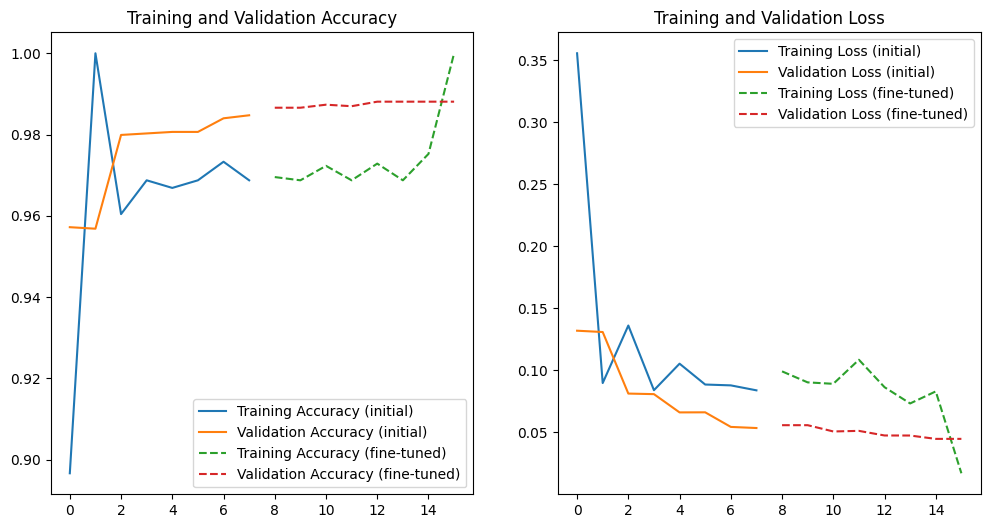

In [4]:
# Unfreeze the top layers of the base model
# Let's unfreeze the last 20 layers for fine-tuning
for layer in base_model.layers[-5:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary to check the trainable layers
model.summary()

# Fine-tune the model
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,  # You may increase the number of epochs for fine-tuning
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Save the fine-tuned model
model.save('efficientnetb2_fine_tuned_image_classification_model.h5')

# Evaluate the fine-tuned model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation loss after fine-tuning: {loss}')
print(f'Validation accuracy after fine-tuning: {accuracy}')

# Plot training & validation accuracy and loss values for initial training and fine-tuning
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

acc_fine = history_fine.history['accuracy']
val_acc_fine = history_fine.history['val_accuracy']
loss_fine = history_fine.history['loss']
val_loss_fine = history_fine.history['val_loss']

# Adjusting the length of epochs_range for the concatenated data
fine_epochs_range = range(epochs, epochs + len(acc_fine))

plt.figure(figsize=(12, 6))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy (initial)')
plt.plot(epochs_range, val_acc, label='Validation Accuracy (initial)')
plt.plot(fine_epochs_range, acc_fine, label='Training Accuracy (fine-tuned)', linestyle='dashed')
plt.plot(fine_epochs_range, val_acc_fine, label='Validation Accuracy (fine-tuned)', linestyle='dashed')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss (initial)')
plt.plot(epochs_range, val_loss, label='Validation Loss (initial)')
plt.plot(fine_epochs_range, loss_fine, label='Training Loss (fine-tuned)', linestyle='dashed')
plt.plot(fine_epochs_range, val_loss_fine, label='Validation Loss (fine-tuned)', linestyle='dashed')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()